In [65]:
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier  # Para clasificación
from sklearn.ensemble import RandomForestRegressor  # Para regresión

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

from sklearn.metrics import mean_squared_error

In [66]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [67]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [68]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

Buscamos modelo predictivo para nuestra columna "Target"

In [69]:
df_train = df.copy()
df_train.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
37833,37834,38,admin.,casado,secundaria/superiores,no,3047,si,no,Sin Información,285,6-may-2021,2,-1,0,Sin Información,no
21190,21191,44,management,casado,universitarios,no,612,si,no,Sin Información,88,29-may-2021,2,-1,0,Sin Información,no
23335,23336,39,blue-collar,casado,priamaria,no,8637,si,no,fijo,78,20-apr-2021,1,313,1,sin_exito,no


In [70]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
priamaria                 6708
Name: count, dtype: int64


In [71]:
# Reemplaza el valor erróneo en la columna 'educacion'
df['educacion'] = df['educacion'].replace('priamaria', 'primaria')


In [72]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
primaria                  6708
Name: count, dtype: int64


In [73]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
16619,36,blue-collar,soltero,secundaria/superiores,no,35,si,no,Sin Información,435,3,-1,0,Sin Información,no
33033,45,blue-collar,casado,priamaria,no,1992,si,no,Sin Información,163,1,-1,0,Sin Información,no
29034,34,technician,casado,universitarios,no,218,no,no,movil,109,2,-1,0,Sin Información,no


In [74]:

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(42446, 38)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,target,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
1209,33,902,207,2,247,2,no,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1490,43,146,50,1,113,5,no,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4573,39,394,551,2,-1,0,no,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8050,57,0,124,1,-1,0,no,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
20878,24,-232,108,1,-1,0,no,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [75]:
df_train.sample(5)

,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,target,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
16310,33,1746,152,2,-1,0,no,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
42107,40,3160,100,4,-1,0,no,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
26259,58,37,236,2,-1,0,no,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
37692,49,1071,225,1,91,1,si,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
17422,29,985,396,2,-1,0,si,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [76]:
df_train['target'] = df_train['target'].map({'no': 0, 'si': 1})

In [77]:
X = df_train.drop(columns=["target"],inplace=False)
y = df_train["target"]

print("Tamaño X",X.shape)
print("Tamaño y",y.shape)

Tamaño X (42446, 37)
Tamaño y (42446,)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [79]:
print("Tamaño X_train",X_train.shape)
print("Tamaño y_train",y_train.shape)
print("Tamaño X_test",X_test.shape)
print("Tamaño y_test",y_test.shape)

Tamaño X_train (31834, 37)
Tamaño y_train (31834,)
Tamaño X_test (10612, 37)
Tamaño y_test (10612,)


In [80]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.8994534489257444


In [89]:
mse

0.10054655107425556

In [81]:
# Estandarización controlada

estandarizador = StandardScaler()
estandarizador.fit(X_train)
X_train_std=estandarizador.transform(X_train)
X_test_std=estandarizador.transform(X_test)

In [82]:
# 'model' es tu modelo entrenado DecisionTreeClassifier y 'df_train' es tu DataFrame original con las características de entrenamiento
# Selecciona todas las características (X) de tu DataFrame original 'df_train'
X_base_datos = df_train.drop('target', axis=1, inplace=False)  # Asegúrate de excluir la columna de la variable objetivo si está presente

# Realiza la predicción utilizando el modelo entrenado
y_pred_base_datos = model.predict(X_base_datos)

# Ahora 'y_pred_base_datos' contiene las predicciones para toda tu base de datos


In [83]:
# utilizaremos la predicion de todo el df y lo agregamos en una nueva columna para comprar valores reales a los predichos

df['target_predicho'] = y_pred_base_datos

df.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho
9271,9272,32,technician,soltero,universitarios,no,1246,si,no,movil,192,4-feb-2021,2,-1,0,Sin Información,si,1
20481,20482,38,services,soltero,secundaria/superiores,no,9609,si,no,movil,1687,11-aug-2021,9,-1,0,Sin Información,no,0
10329,10330,39,blue-collar,casado,secundaria/superiores,no,-99,no,no,movil,260,17-jul-2021,1,-1,0,Sin Información,no,0


In [84]:
# Suponiendo que 'df' es tu DataFrame original con las columnas 'target' y 'predicciones'

# Contar los valores en la columna 'target'
conteo_target = df['target'].value_counts()

# Contar los valores en la columna 'predicciones'
conteo_predicciones = df['target_predicho'].value_counts()

# Imprimir los conteos
print("Conteo de valores en la columna 'target':")
print(conteo_target)
print("\nConteo de valores en la columna 'predicciones':")
print(conteo_predicciones)


Conteo de valores en la columna 'target':
target
no    37505
si     4941
Name: count, dtype: int64

Conteo de valores en la columna 'predicciones':
target_predicho
0    38021
1     4425
Name: count, dtype: int64


# Vamos a clasificar todas aquellas personas que tienen "si" en nuestra columna 'target' asi conoceremos mejor nuestros potenciales cliente

In [85]:
# Buscaremos usar un metodo jerarquico para poder agrupar las personas que tengan "si" en nuestra columna 'target'

df_cluster = df.drop(columns=['ID', 'tipo_contacto', 'duracion', 'fecha_contacto', 'campaign', 'tiempo_transcurrido', 'contactos_anteriores', 'resultado_campanas_anteriores'], inplace=False)

df_cluster.sample(3)


,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,target,target_predicho
21718,48,admin.,casado,secundaria/superiores,no,0,no,si,no,0
32017,31,technician,casado,universitarios,no,442,no,no,no,0
7411,36,blue-collar,casado,secundaria/superiores,no,688,si,no,no,0


In [86]:
#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_cluster[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','target','target_predicho']])
a=onehot.transform(df_cluster[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','target','target_predicho']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','target','target_predicho']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_cluster.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_cluster_train=pd.concat([df_cluster,encoded_df],axis=1)

# Elimino la columna original antigua, la categórica
df_cluster_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','target','target_predicho'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_cluster_train.shape)
df_cluster_train.sample(5)

(42446, 30)


,edad,saldo,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,trabajo_management,trabajo_retired,trabajo_self-employed,trabajo_services,...,deuda_no,deuda_si,vivienda_no,vivienda_si,prestamo_no,prestamo_si,target_no,target_si,target_predicho_0,target_predicho_1
10659,41,1278,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
30597,25,815,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
26311,35,-269,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
42182,33,4636,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
38853,30,-672,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [87]:
# Guardaremos nuestro modelo para poder aplicarlo en otra base de datos llamada Data_test


# Entrena tu modelo con los datos de entrenamiento
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Guarda el modelo entrenado en un archivo
joblib.dump(model, 'modelo_entrenado.pkl')

# Luego, en otro script o en otro momento cuando necesites usar el modelo entrenado:

# Carga el modelo entrenado desde el archivo
# model_cargado = joblib.load('modelo_entrenado.pkl')

# Ahora puedes usar el modelo cargado para hacer predicciones en tus nuevas bases de datos
# y_pred_base1 = model_cargado.predict(X_base1)
# y_pred_base2 = model_cargado.predict(X_base2)

['modelo_entrenado.pkl']

### Curva de aprendizaje **Random Forest** 
- Mediante una función

In [90]:
# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.10054655107425556


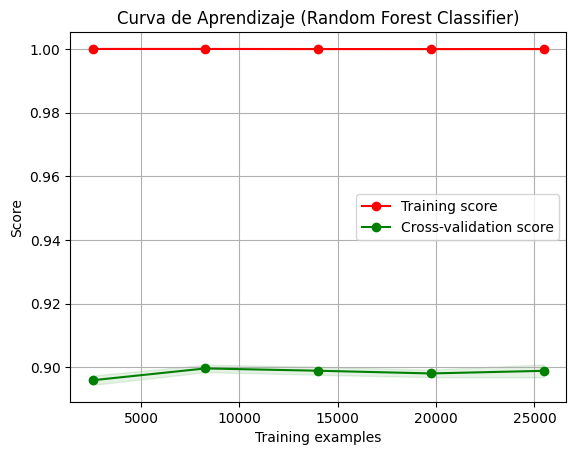

In [93]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Suponiendo que tienes tus datos de entrenamiento X_train, y_train

# Crear el clasificador de Random Forest Classifier
model = RandomForestClassifier()

# Visualizar la curva de aprendizaje
title = "Curva de Aprendizaje (Random Forest Classifier)"
plot_learning_curve(model, title, X_train, y_train, cv=5)

plt.show()

